## Домашнее задание

Основаная задача - **построить хорошую тематическую модель с интерпретируемыми топиками с помощью BigARTM**.

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - `pip install pymorphy2[fast]`, можно использовать какой-то другой токенизатор) 

2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы); 

3) сохраните тексты .vw формате;

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно - из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается); 

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем; 

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

7) в другой ячейке нарисуйте график обучения этой модели 

8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);

Сохраните тетрадку с экспериментами и положите её на гитхаб, ссылку на неё укажите в форме.

**Оцениваться будут главным образом пункты 6, 7 и 8. (3, 1, 4 баллов соответственно). Чтобы заработать остальные 2 балла, нужно хотя бы немного изменить мой код на промежуточных этапах (добавить что-то, указать другие параметры и т.д). **

### Установка BigARTM
Все точно как в инструкции на их сайте, только без установки питона и пипа.

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
git is already the newest version (1:2.17.1-1ubuntu0.4).
The following additional packages will be installed:
  autotools-dev cmake-data file ibverbs-providers libarchive13
  libboost-atomic-dev libboost-atomic1.65-dev libboost-atomic1.65.1
  libboost-chrono-dev libboost-chrono1.65-dev libboost-chrono1.65.1
  libboost-container-dev libboost-container1.65-dev libboost-container1.65.1
  libboost-context-dev libboost-context1.65-dev libboost-context1.65.1
  libboost-coroutine-dev libboost-coroutine1.65-dev libboost-coroutine1.65.1
  libboost-date-time-dev libboost-date-time1.65-dev libboost-date-time1.65.1
  libboost-dev libboost-exception-dev libboost-exception1.65-dev
  libboost-fiber-dev libboost-fiber1.65-dev libboost-fiber1.65.1
  libboost-filesy

In [3]:
!pip install protobuf tqdm wheel

In [4]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 16004 (delta 18), reused 9 (delta 3), pack-reused 15953
Receiving objects: 100% (16004/16004), 17.00 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (11152/11152), done.


In [5]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [7]:
cd build

/content/bigartm/build


In [8]:
!cmake ..

-- The C compiler identification is GNU 7.3.0
-- The CXX compiler identification is GNU 7.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [9]:
!make

Scanning dependencies of target gflags-static
[  1%] Building CXX object 3rdparty/gflags/CMakeFiles/gflags-static.dir/src/gflags.cc.o
[  1%] Building CXX object 3rdparty/gflags/CMakeFiles/gflags-static.dir/src/gflags_reporting.cc.o
[  1%] Building CXX object 3rdparty/gflags/CMakeFiles/gflags-static.dir/src/gflags_completions.cc.o
[  2%] Linking CXX static library ../../lib/libgflags.a
[  2%] Built target gflags-static
Scanning dependencies of target google-glog
[  2%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/logging.cc.o
[  2%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/raw_logging.cc.o
[  3%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/vlog_is_on.cc.o
[  3%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/utilities.cc.o
[  3%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/demangle.cc.o
[  4%] Building CXX object 3rdparty/glog/CMakeFiles/google-glog.dir/src/symbolize.cc.o
[  4%] Build

In [10]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.9.0-cp36-cp36m-linux_x86_64.whl


Вернемся в изначальную папку.

In [11]:
cd ../.. 

/content


In [12]:
!pip install pymorphy2[fast] nltk gensim

    100% |████████████████████████████████| 51kB 2.0MB/s 
    100% |████████████████████████████████| 23.6MB 1.8MB/s 
    100% |████████████████████████████████| 7.1MB 5.3MB/s 
    100% |████████████████████████████████| 256kB 25.8MB/s 
    100% |████████████████████████████████| 1.4MB 15.2MB/s 
    100% |████████████████████████████████| 133kB 24.1MB/s 
    100% |████████████████████████████████| 5.1MB 6.1MB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 552kB 23.2MB/s 
  Running setup.py bdist_wheel for docopt ... - done
  Stored in directory: /root/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for DAWG ... - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
  Running setup.py bdist_wheel for smart-open ... - done
  St

In [13]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - pip install pymorphy2[fast], можно использовать какой-то другой токенизатор);

In [0]:
def remove_tags(text):
    text = re.sub('&gt;', '', text)
    text = re.sub('&lt;', '', text)
    return re.sub(r'<[^>]+>', '', text)

def clean(words):
    clean = [morph.parse(word)[0].normal_form for word in words if word.isalnum()]
    return clean

## Возьмем теже данные

In [16]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2018-12-02 10:13:12--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2018-12-02 10:13:13--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  26.7MB/s    in 0.7s    

2018-12-02 10:13:14 (26.7 M

In [17]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы);

In [0]:
habr_texts = [clean(word_tokenize(remove_tags(text.lower()))) for text in open('habr_texts.txt')]

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# вернемся сюда через какое-то время
ph = gensim.models.Phrases(habr_texts, scoring='npmi', threshold=0.3, 
                           common_terms=set(stopwords.words('russian'))) # можно указать слова, которые 
                                                                          # не будут учитываться
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[habr_texts]

In [0]:
#p[habr_texts[1]]

Для BigARTM требуется специальный формат данных. Их несколько, но мы возьмем vowpal wabbit.  
На каждой строчке файла находится одельный текст, записывается такст вот таким образом:  
```doc_name |@class_id word_1:1 word_2:3```  

|@class_id - задает модальность, но когда она одна её можно не указывать.

word_2:3 - слово и его частота (обратите внимание, что : - специальный символ и в словах его быть не может

3) сохраните тексты .vw формате;

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



Для оценки будем использовать такую функцию (из туториалов от создателей библиотеки)

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

BigARTM работает не с целым файлом, а с кусочками. Поэтому разбиваем наш .vw файл специальным классом в artm.

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

Уже созданные батчи можно заново загружать

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно - из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается);

In [0]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

Собираем словарь по батчам

In [34]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=1a97b040-9266-493a-a905-4c7d54800e17, num_entries=15390)

Его можно сохранить, чтобы не создавать снова или чтобы посмотреть и подредактировать.

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

Создаем модель и сразу включаем два регуляризатора (Декореляции и Сглаживания)

`artm.DecorrelatorPhiRegularizer` - регуляризатор декорреляции тем, делает темы менее похожими друг на друга (рекомендуется включать его сразу на всех темах с положительным значением tau и не менять его в процессе обучения)  

`artm.SmoothSparsePhiRegularizer` - регуляризатор сглаживания/разреженивания Phi (тем) - сглаживает или расреживает распределение слов в темах (отрицательный tau - разреживает, положительный - сглаживает), рекомендуется сразу включать сглаживание на всех темах и не менять его в процессе обучения;

Количество тем нужно подбирать, но 200 часто работает хорошо. Снижение количества тем и уменьшения словаря ведут к уменьшению времени обучения модели (а увеличение, наоборот). 

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем;

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

# не забывайте менять количество топиков в регуляризаторах, они применяются только на тех темах, что заданы

In [0]:
# инициализурем модель словарем
model_artm.initialize(dictionary=dictionary, )

In [0]:
# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

In [0]:
def new_model(dictionary, batch_vectorizer, tau=0.25, n_topics=200, passes=2):
  
    model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(n_topics)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=tau, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(1, n_topics)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, n_topics)])
                                    ]
                        )

    model_artm.initialize(dictionary=dictionary, )
    
    model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
    model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
    model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
    model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore',
                                            probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
    model_artm.scores.add(artm.TopTokensScore(class_id='@default_class',
                                          name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 
    
    model_artm.num_document_passes = passes
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)
    print(print_measures(model_artm))
    
    return model_artm

### Тренируем модель

Пройдемся несколько раз по коллекции, чтобы модель немного сошлась (если доков сильно больше то может быть достаточно и 1 прохода). Для сильно больших коллекций есть fit_online, который обновляется в процессе прохода по коллекции, про него можно почитать в документации.

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4445.665 (ARTM)


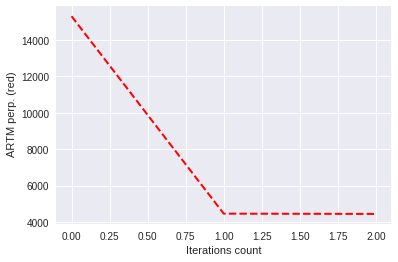

In [43]:
# посмотрим, что стало с моделью
# если график сильно падал на последних итерациях, то можно прогнать обучение ещё несколько раз 
# (не добавляя другие регуляризаторы)
print_measures(model_artm)

Добавим регуляризаторы разреженности тем и документов.

Их рекомендуется добавлять после того, как модель уже как-то сошлась. После добавления их рекомендуется постепенно уменьшать, чтобы усиливать разреживание. Их можно применять не ко всем темам, чтобы в каких-то темах собрались все стоп-слова.

Можно добавлять их вместе или по отдельности.

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
# будем постепенно увеличивать значения этих регуляризаторов
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.787 ARTM)
Sparsity Theta: 0.091 (ARTM)
Kernel contrast: 0.264 (ARTM)
Kernel purity: 0.239 (ARTM)
Perplexity: 2175.538 (ARTM)


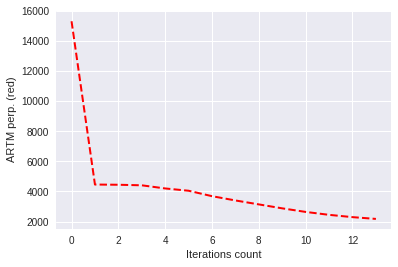

In [47]:
# посмотрим на качество
print_measures(model_artm)

In [0]:
def new_regularizers_add(model_artm, tau, n_topics=200):
  
    model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=tau, 
                                                            topic_names=['topic_{}'.format(i) 
                                                                         for i in range(1, n_topics)],
                                                            ))
    model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=tau, 
                                                              topic_names=['topic_{}'.format(i) 
                                                                           for i in range(1, n_topics)]))
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)
    
    phi_tau = model_artm.regularizers['SparsePhi'].tau
    theta_tau = model_artm.regularizers['SparseTheta'].tau

    for i in range(10):
        model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
        model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.5))
    
        model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    
    #print_measures(model_artm)
    
    return model_artm

Перплексия должна снижаться. Если график выровнился и больше не меняется - модель сошлась. Обычно перплексия хорошей модели около 200-1000. На таком небольшом количестве данных возможно такого значения достичь не получится.

In [0]:
import pandas as pd

In [81]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:10]:
    print(topic_name + ': ')
    try:
        print(' '.join(model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]))   
        print('---------')
        print('\n')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
дверь капитан пират страх новогодний рука пиратский герой юлмарт годность
---------


topic_1: 
устройство intel ноутбук атака компьютер процессор злоумышленник память lenovo usb
---------


topic_2: 
человек ты лекция курс книга социальный мой сказать день вопрос
---------


topic_3: 
информационный решение компания разработка проект являться процесс результат обеспечение развитие
---------


topic_4: 
робот говорить результат современный процесс дело задача качество количество сейчас
---------


topic_5: 
устройство регистратор аккумулятор китайский камера дрон технология батарея gps производитель
---------


topic_6: 
ваш вопрос человек продукт пользователь сайт кто да хотеть ни
---------


topic_7: 
заказчик задача команда scrum проект ресурс спринт тз сервер сервис
---------


topic_8: 
gt lt 1 2 include html key file print li
---------


topic_9: 
программа объект язык функция часть ошибка тип элемент следующий некоторый
---------





n_topics:  50
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.029 (ARTM)
Kernel purity: 0.002 (ARTM)
Perplexity: 4334.040 (ARTM)


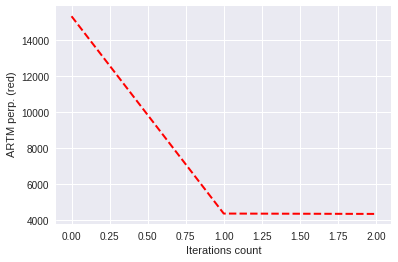

None
Sparsity Phi: 0.572 ARTM)
Sparsity Theta: 0.022 (ARTM)
Kernel contrast: 0.246 (ARTM)
Kernel purity: 0.340 (ARTM)
Perplexity: 2698.941 (ARTM)


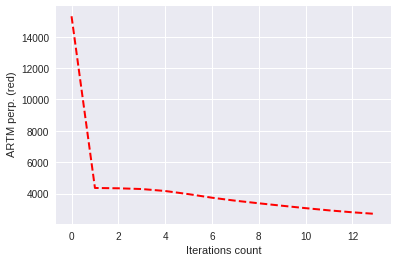


n_topics:  100
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.009 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4365.355 (ARTM)


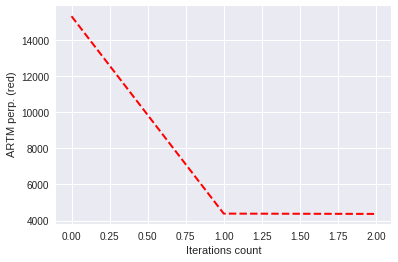

None
Sparsity Phi: 0.689 ARTM)
Sparsity Theta: 0.051 (ARTM)
Kernel contrast: 0.247 (ARTM)
Kernel purity: 0.277 (ARTM)
Perplexity: 2430.392 (ARTM)


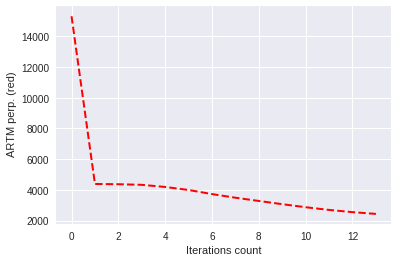


n_topics:  150
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4401.495 (ARTM)


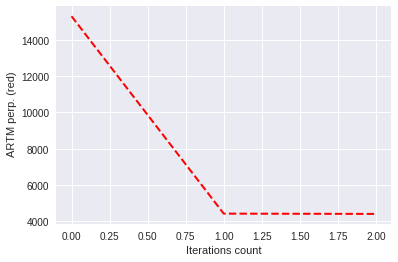

None
Sparsity Phi: 0.750 ARTM)
Sparsity Theta: 0.083 (ARTM)
Kernel contrast: 0.251 (ARTM)
Kernel purity: 0.251 (ARTM)
Perplexity: 2265.380 (ARTM)


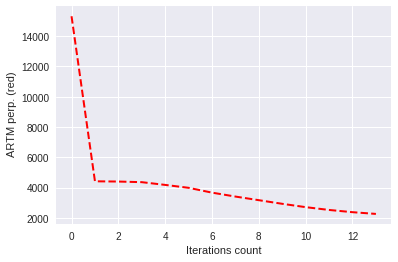


n_topics:  200
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.001 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4445.665 (ARTM)


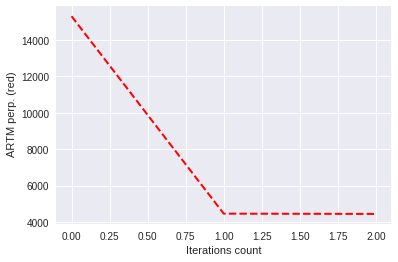

None
Sparsity Phi: 0.790 ARTM)
Sparsity Theta: 0.122 (ARTM)
Kernel contrast: 0.265 (ARTM)
Kernel purity: 0.242 (ARTM)
Perplexity: 2152.376 (ARTM)


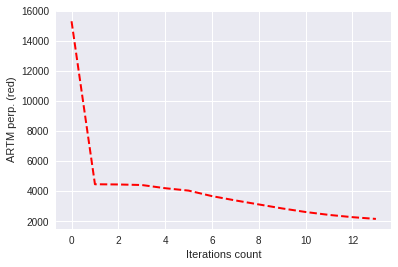


n_topics:  250
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4491.046 (ARTM)


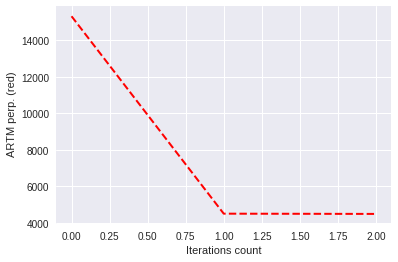

None
Sparsity Phi: 0.819 ARTM)
Sparsity Theta: 0.156 (ARTM)
Kernel contrast: 0.274 (ARTM)
Kernel purity: 0.226 (ARTM)
Perplexity: 2070.799 (ARTM)


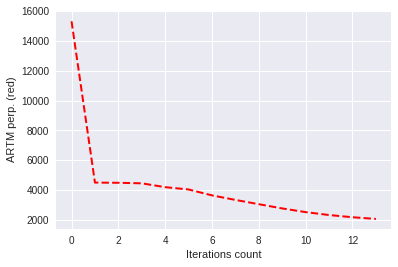


n_topics:  300
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4537.559 (ARTM)


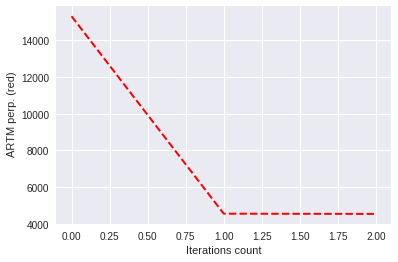

None
Sparsity Phi: 0.841 ARTM)
Sparsity Theta: 0.192 (ARTM)
Kernel contrast: 0.282 (ARTM)
Kernel purity: 0.220 (ARTM)
Perplexity: 2006.018 (ARTM)


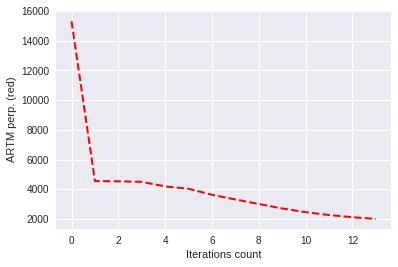


n_topics:  350
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4586.468 (ARTM)


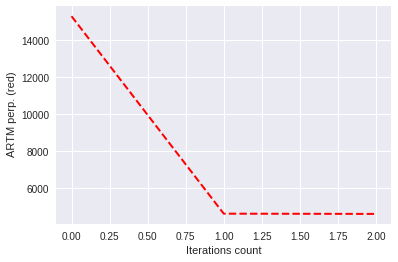

None
Sparsity Phi: 0.859 ARTM)
Sparsity Theta: 0.223 (ARTM)
Kernel contrast: 0.287 (ARTM)
Kernel purity: 0.213 (ARTM)
Perplexity: 1958.720 (ARTM)


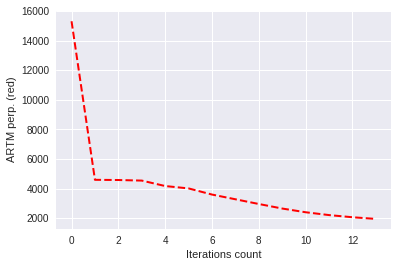


n_topics:  400
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4637.268 (ARTM)


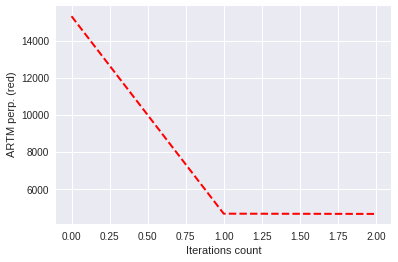

None
Sparsity Phi: 0.873 ARTM)
Sparsity Theta: 0.259 (ARTM)
Kernel contrast: 0.296 (ARTM)
Kernel purity: 0.209 (ARTM)
Perplexity: 1907.309 (ARTM)


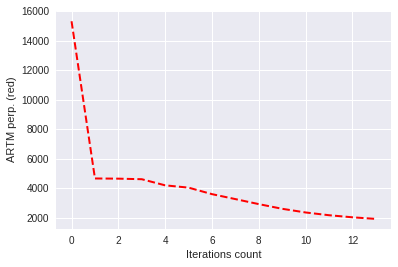


n_topics:  450
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4687.804 (ARTM)


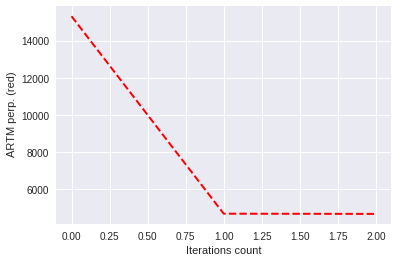

None
Sparsity Phi: 0.885 ARTM)
Sparsity Theta: 0.295 (ARTM)
Kernel contrast: 0.298 (ARTM)
Kernel purity: 0.209 (ARTM)
Perplexity: 1852.991 (ARTM)


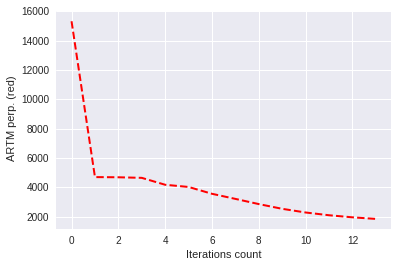


n_topics:  500
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


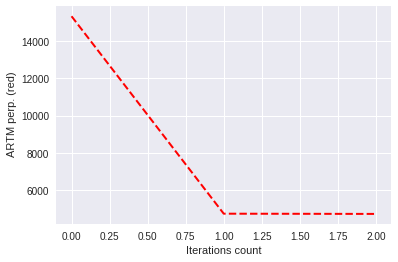

None
Sparsity Phi: 0.895 ARTM)
Sparsity Theta: 0.330 (ARTM)
Kernel contrast: 0.306 (ARTM)
Kernel purity: 0.210 (ARTM)
Perplexity: 1807.996 (ARTM)


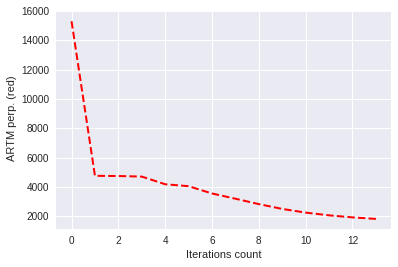

In [109]:
for i in range(50, 550, 50): 
    print('\nn_topics: ', i)
    print('---------')
    model = new_model(dictionary, batch_vectorizer, n_topics=i)
    model2 = new_regularizers_add(model, tau = -0.15, n_topics=i)


tau:  -1
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


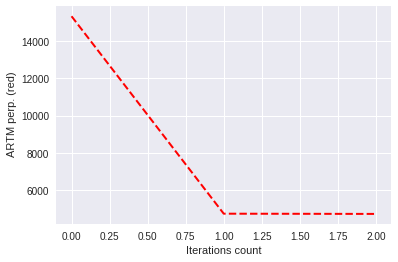

None
Sparsity Phi: 0.995 ARTM)
Sparsity Theta: 0.888 (ARTM)
Kernel contrast: 0.572 (ARTM)
Kernel purity: 0.720 (ARTM)
Perplexity: 2157.999 (ARTM)


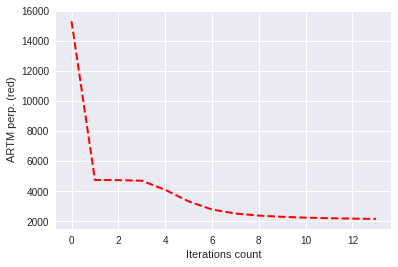


tau:  -0.5
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


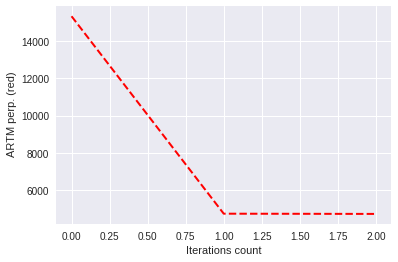

None
Sparsity Phi: 0.988 ARTM)
Sparsity Theta: 0.779 (ARTM)
Kernel contrast: 0.611 (ARTM)
Kernel purity: 0.564 (ARTM)
Perplexity: 1848.276 (ARTM)


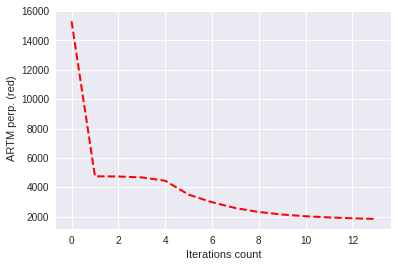


tau:  0
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


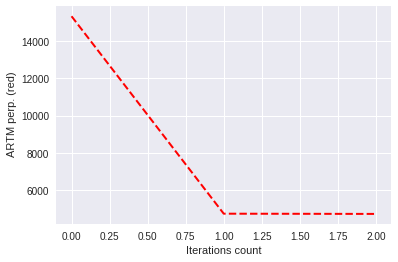

None
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.027 (ARTM)
Kernel purity: 0.032 (ARTM)
Perplexity: 3392.406 (ARTM)


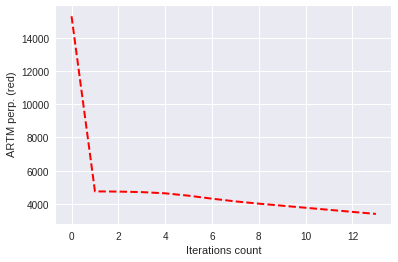


tau:  0.15
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


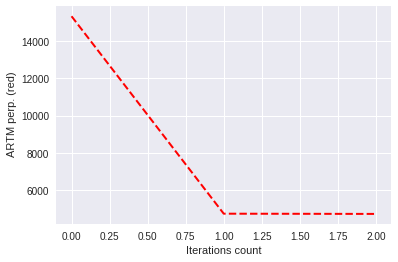

None
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.009 (ARTM)
Kernel purity: 0.014 (ARTM)
Perplexity: 4399.046 (ARTM)


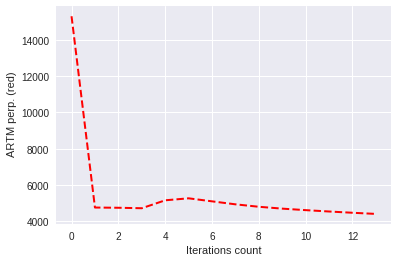


tau:  0.5
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


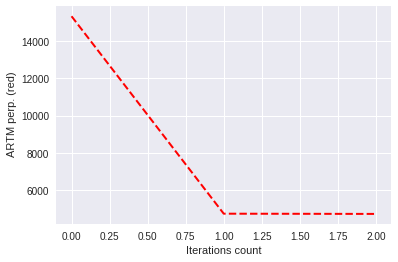

None
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.006 (ARTM)
Kernel purity: 0.008 (ARTM)
Perplexity: 5716.230 (ARTM)


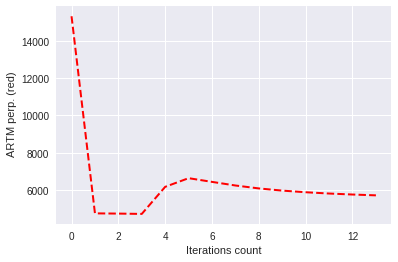


tau:  1
---------
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 4738.861 (ARTM)


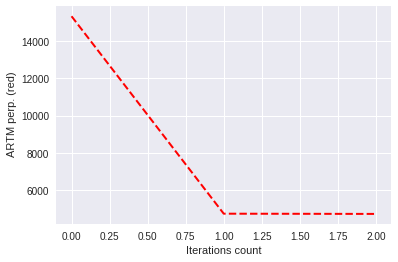

None
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.004 (ARTM)
Perplexity: 6997.815 (ARTM)


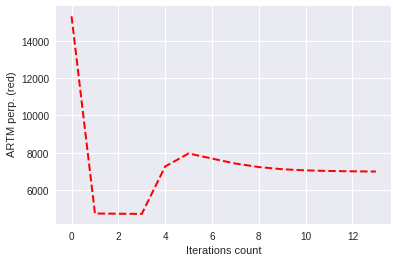

In [114]:
for i in [-1, -0.5, 0, 0.15, 0.5, 1]: 
    print('\ntau: ', i)
    print('---------')
    model = new_model(dictionary, batch_vectorizer, n_topics=500)
    model2 = new_regularizers_add(model, tau=i, n_topics=500)

7) в другой ячейке нарисуйте график обучения этой модели

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.002 (ARTM)
Kernel contrast: 0.097 (ARTM)
Kernel purity: 0.031 (ARTM)
Perplexity: 2684.579 (ARTM)


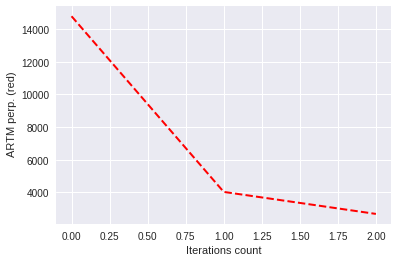

None
Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.002 (ARTM)
Kernel contrast: 0.097 (ARTM)
Kernel purity: 0.031 (ARTM)
Perplexity: 2684.579 (ARTM)


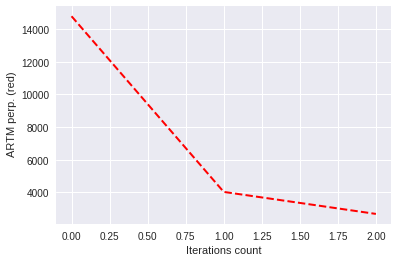

In [139]:
result = new_model(dictionary, batch_vectorizer, tau=-0.25, n_topics=500, passes=20)
print_measures(result)

Sparsity Phi: 0.931 ARTM)
Sparsity Theta: 0.959 (ARTM)
Kernel contrast: 0.206 (ARTM)
Kernel purity: 0.236 (ARTM)
Perplexity: 1113.744 (ARTM)


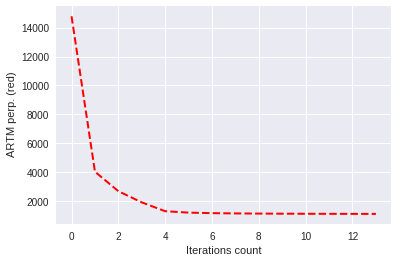

In [126]:
result_result = new_regularizers_add(result, tau=-0.25, n_topics=500)

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

In [135]:
for i in [2, 6, 15]:
    topic_name = result_result.topic_names[i]
    print(topic_name + ': ')
    print(' '.join(result_result.score_tracker['TopTokensScore_1'].last_tokens[topic_name]))   
    print('---------')

topic_2: 
человек мой дело вопрос идея ли день слово писать важный
---------
topic_6: 
ваш кандидат выбор имя ли важный человек кампания стоить потому
---------
topic_15: 
число цифра значение количество слово разряд сумма результат округление десятичный
---------


8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);

Изменение: в список стоп-слов был добавлен список английский слоп слов, были добавлены нграммы. Все модели обучались одинаковым способом.

Количество тем -- перебирались от 50 до 550 (было выбрано 500)

tau  (и для регуляризатор сглаживания и для регуляризатора декорреляции) -- перебиралось от -1 до 1 (было выбрано 0,25 и -0,25)

Вообще, проходимся 20 раз по всему доку, после этого добавляем регуляризорт разреживания тем и разреженность документам. после добавления можно пронаблюдать улучшение результатов. Вывденные темы не идеальны, однако примерно пожно понять, о чём речь.